# City Weather Comparison

This notebook contains daily weather data for Cincinnati OH/Northern KY, Louisville KY, New York City NY, and Los Angeles CA, from January 2022 to December 2022. The data was requested from the NOAA Climate.gov website. Analysis of daily temperature highs, lows, and averages, as well as snowfall and precipitation will show which months are the hottest and coldest, including the months with the most precipitation and snowfall. 

# Feature 1: Read in data from a local CSV file 
'Weather_Datasets/Data-Cinci_NKY_Weather.csv', 'Weather_Datasets/Louisville_Weather_CSV.csv', 'Weather_Datasets/New_York_Weather.csv', 'Weather_Datasets/Los_Angeles_Weather.csv'

Use pandas library to read csv files. Import pandas and numpy libraries for data analysis and mathematical calculations. Import matplotlib for data visualization, and datetime module to work with dates as datetime64.

In [16]:
# Packages
import pandas as pd 
import numpy as np 
import datetime 
import matplotlib.pyplot as plt 

In [17]:
# DataFrames
df1_Cin_NKY_W = pd.read_csv('Weather_Datasets/Weather_Data-Cinci_NKY_Weather.csv') 
df2_Louis_W = pd.read_csv('Weather_Datasets/Louisville_Weather_CSV.csv') 
df3_NYC_W = pd.read_csv('Weather_Datasets/New_York_Weather.csv')
df4_LA_W = pd.read_csv('Weather_Datasets/Los_Angeles_Weather.csv') 

# Set datetime
df1_Cin_NKY_W['DATE'] = pd.to_datetime(df1_Cin_NKY_W['DATE']) 
df2_Louis_W['DATE'] = pd.to_datetime(df2_Louis_W['DATE'])
df3_NYC_W['DATE'] = pd.to_datetime(df3_NYC_W['DATE']) 
df4_LA_W['DATE'] = pd.to_datetime(df4_LA_W['DATE']) 

## Data before cleaning
There are two columns, 'LATITUDE' and 'LONGITUDE' that are not needed. 
The 'NAME' column needs to be renamed.
All columns except 'DATE' and 'SNOW' are abreviated, and thier names need to be changed. 

In [18]:
df1_Cin_NKY_W.head() # The head() function by default displays the first five rows in a particular dataframe. 

,NAME,LATITUDE,LONGITUDE,DATE,PRCP,SNOW,TAVG,TMAX,TMIN
0,"CIN/NKY INTERNATIONAL AIRPORT, KY US",39.04443,-84.67241,2022-01-01,1.01,0.0,58,64,52
1,"CIN/NKY INTERNATIONAL AIRPORT, KY US",39.04443,-84.67241,2022-01-02,0.20,0.0,41,52,28
2,"CIN/NKY INTERNATIONAL AIRPORT, KY US",39.04443,-84.67241,2022-01-03,0.00,0.0,27,33,21
3,"CIN/NKY INTERNATIONAL AIRPORT, KY US",39.04443,-84.67241,2022-01-04,0.00,0.0,29,44,21
4,"CIN/NKY INTERNATIONAL AIRPORT, KY US",39.04443,-84.67241,2022-01-05,0.00,0.0,42,47,22


In [19]:
df3_NYC_W.tail() # The tail() function by default displays the last five rows in a particular datafarame. 

,NAME,LATITUDE,LONGITUDE,DATE,PRCP,SNOW,TAVG,TMAX,TMIN
360,"JFK INT AIRPORT, NY US",40.63915,-73.7639,2022-12-27,0.00,0.0,30,35,28
361,"JFK INT AIRPORT, NY US",40.63915,-73.7639,2022-12-28,0.00,0.0,36,45,27
362,"JFK INT AIRPORT, NY US",40.63915,-73.7639,2022-12-29,0.00,0.0,39,46,32
363,"JFK INT AIRPORT, NY US",40.63915,-73.7639,2022-12-30,0.00,0.0,42,51,34
364,"JFK INT AIRPORT, NY US",40.63915,-73.7639,2022-12-31,0.27,0.0,46,51,41


# Cincinnati OH/Northern KY 

### Section 1:
Understanding data.
Cleaning and manipulating data.
### Section 2:
Analysis and graphing of data.

In [20]:
# Undersdanding Cincinnati/Northern KY Data 
C_NKY_column_list = df1_Cin_NKY_W.columns # The columns function returns the label in each dataframe.
print(C_NKY_column_list) 
C_NKY_data_types = df1_Cin_NKY_W.dtypes # The dtypes function describes aspects of the data.
print(C_NKY_data_types) 
C_NKY_shape = df1_Cin_NKY_W.shape # The shape function lets the user know the number of rows and columns in the dataframe
print(C_NKY_shape) 

Index(['NAME', 'LATITUDE', 'LONGITUDE', 'DATE', 'PRCP', 'SNOW', 'TAVG', 'TMAX',
       'TMIN'],
      dtype='object')
NAME                 object
LATITUDE            float64
LONGITUDE           float64
DATE         datetime64[ns]
PRCP                float64
SNOW                float64
TAVG                  int64
TMAX                  int64
TMIN                  int64
dtype: object
(365, 9)


# Feature 2: Clean and Manipulate Data
The rename() function is used to alter the column names in each dataset. The 'NAME' column is changed to 'LOCATION', 'TMIN' to 'LOW', and so on. 
The drop() function removes rows or columns by specifying label names. Both 'LATITUDE' and 'LONGITUDE' columns are removed.
The inplace = True argumet makes changes permanent. 
The datetime module changed the 'DATE' from a string-type object to datetime64.

In [21]:
# Renaming Cincinnati/Northern KY Columns 
df1_Cin_NKY_W.rename(columns = {'NAME': 'LOCATION', 'TMIN': 'LOW', 'TMAX': 'HIGH', 'PRCP': 'PRECIPITATION', 'TAVG': 'AVERAGE'}, inplace = True)  

# Deleting Columns for Cincinnati/Northern KY dataframe
df1_Cin_NKY_W.drop(columns = ['LATITUDE', 'LONGITUDE'], inplace = True) 


In [22]:
df1_Cin_NKY_W.head(7) 

,LOCATION,DATE,PRECIPITATION,SNOW,AVERAGE,HIGH,LOW
0,"CIN/NKY INTERNATIONAL AIRPORT, KY US",2022-01-01,1.01,0.0,58,64,52
1,"CIN/NKY INTERNATIONAL AIRPORT, KY US",2022-01-02,0.20,0.0,41,52,28
2,"CIN/NKY INTERNATIONAL AIRPORT, KY US",2022-01-03,0.00,0.0,27,33,21
3,"CIN/NKY INTERNATIONAL AIRPORT, KY US",2022-01-04,0.00,0.0,29,44,21
4,"CIN/NKY INTERNATIONAL AIRPORT, KY US",2022-01-05,0.00,0.0,42,47,22
5,"CIN/NKY INTERNATIONAL AIRPORT, KY US",2022-01-06,0.05,0.7,21,23,16
6,"CIN/NKY INTERNATIONAL AIRPORT, KY US",2022-01-07,0.00,0.0,15,17,11


# Feature 3: Data Analysis
The mean() function is used to calculate the mean (average) for the 'HIGH', 'LOW', and 'AVERAGE' columns.
The round() function returns a rounded version of a float number with a specified number of decimals.
The max() function returns the highest value for the 'HIGH' column.
The min() function returns the lowest value for the 'LOW' column.
The sum() function adds the values for the 'SNOW', and 'PRECIPITATION' columns. 

In [23]:
# Calculations for Cincinnati/Northern Ky
Cin_NKY_monthly_mean = df1_Cin_NKY_W.groupby(df1_Cin_NKY_W.DATE.dt.month)[['HIGH', 'LOW', 'AVERAGE']].mean().round(1) 
Cin_NKY_monthly_max = df1_Cin_NKY_W.groupby(df1_Cin_NKY_W.DATE.dt.month)[['HIGH']].max()
Cin_NKY_monthly_min = df1_Cin_NKY_W.groupby(df1_Cin_NKY_W.DATE.dt.month)[['LOW']].min()
Cin_NKY_monthly_sum = df1_Cin_NKY_W.groupby(df1_Cin_NKY_W.DATE.dt.month)[['SNOW', 'PRECIPITATION']].sum()

## Monthly mean data analysis for Cincinnati OH/Northern KY 
### Average Monthly Temperature
The coldest month of the year is January (28.5°F), followed by February (35.0°F), then December (35.7°F). January was the only month of the year where the average temperature was below freezing. 
Temperatures are much milder during March (47.5°F) and April (52.5°F) in the winter/spring. In the fall temperatures are also mild during October (55.0°F) and November (46.0°F). 
July (77.9°F) is the hottest month of the year, followed by August (74.4°F) and June (74.2°F). May (67.3°F) and September (67.7°F) are warm and mild.  

In [24]:
# Data Analysis for Cincinnati OH/Northern KY
Cin_NKY_monthly_mean 

,HIGH,LOW,AVERAGE
DATE,,,
1,36.6,19.7,28.5
2,44.4,25.3,35.0
3,58.7,36.6,47.5
4,61.5,42.7,52.5
5,76.9,57.5,67.3
6,84.6,63.9,74.2
7,86.9,69.4,77.9
8,84.2,65.9,74.4
9,77.6,58.6,67.7


# Feature 4: Graphing
First graph displays the mean high, low, and average temperatures (In Fahrenheit) for each month of the year.
The second graph shows the highest and lowest temperature (In Fahrenheit) for each month.
The third graph shows the total monthly amount of precipitation and snowfall (In inches). 

### Monthly Mean Graph
The graph shows the mean high, low, and average, temperatures in Fahrenheit for each month. The three coldest months are January February and December, where temperatures average below 40°F. The five hottest months are between May and September with June through August being the hottest. During this time of the year, average temperatures are between 67°F to over 77°F. The rest of the year temperatures are cool, between 45°F and 55°F. 

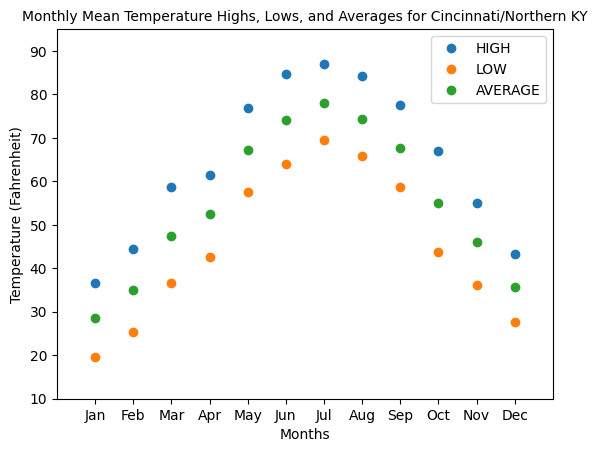

In [25]:
# Graphing mean data for Cincinnati/Northern KY

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.plot(months, Cin_NKY_monthly_mean, 'o')    
plt.xlabel('Months', fontsize=10, color='k')
plt.ylabel('Temperature (Fahrenheit)', fontsize=10, color='k')  
plt.title('Monthly Mean Temperature Highs, Lows, and Averages for Cincinnati/Northern KY', fontsize=10, color='k')   
plt.legend(Cin_NKY_monthly_mean) 
plt.axis([-1, 12, 10, 95]) 

plt.show() 

### Max and Min Data Analysis
The max data show the highest temperature for each month. The two hottest days occured in June and July where the temperature reched 95°F.
The min data show the lowest temperature for each month. The coldest day of the year occured in December, the temperature was -8°F. The second coldest day occurd in January, the temperature was 3°F.

In [26]:
Cin_NKY_monthly_max

,HIGH
DATE,
1,64
2,64
3,80
4,83
5,88
6,95
7,95
8,92
9,93


In [27]:
Cin_NKY_monthly_min

,LOW
DATE,
1,3
2,12
3,15
4,29
5,43
6,53
7,59
8,58
9,40


### Max and Min Graph
The max graph shows the hottest day for each month. The min graph shows the coldest day for month. 

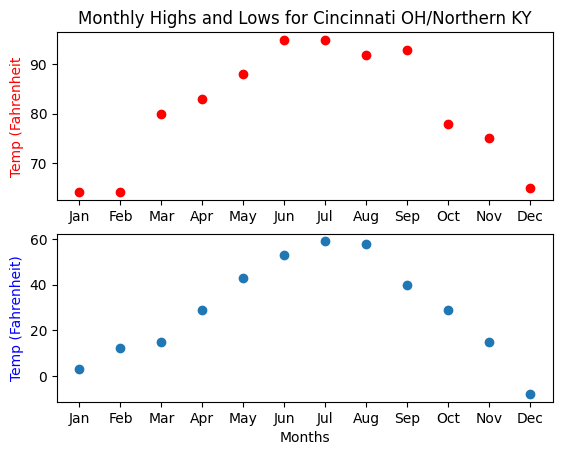

In [28]:
# Plot 1

x = months
y = Cin_NKY_monthly_max
plt.subplot(2, 1, 1,)  
plt.plot(x, y, 'o', color='r') 
plt.title('Monthly Highs and Lows for Cincinnati OH/Northern KY')
#plt.xlabel('Months') 
plt.ylabel('Temp (Fahrenheit', color='r')

# Plot 2
x = months
y = Cin_NKY_monthly_min
plt.subplot(2, 1, 2)
plt.plot(x, y, 'o')  
#plt.title('Lows for Cin/NKY') 
plt.xlabel('Months')
plt.ylabel('Temp (Fahrenheit)', color='b')

plt.show() 

### Snowfall and Precipitation Data Analysis
Snow fell during only five months of the year, with the greatest amount of snow occuring in January and December. Each of those months saw a total of 5.6 inches of snow. The three months with the greatest amount of precipitation were May, August, and February. During each of those months more than six inches of rain fell. May had the greatest amount of precipitation with 9.08 inches of rain. September and October had the least amount of precipitation, with October being the dryest month, with less than 1.0 inch of rain.  

In [29]:
Cin_NKY_monthly_sum

,SNOW,PRECIPITATION
DATE,,
1,5.6,2.34
2,4.8,6.30
3,2.3,2.14
4,0.0,3.30
5,0.0,9.08
6,0.0,2.38
7,0.0,4.48
8,0.0,7.91
9,0.0,1.94


### Snowfall and Precipitation Graph
The graph shows the monthly snowfall and precipitation totals in inches. Snow fell during five months of the year. January through March, then November and December. All 12 months of the year had some amount of rain. 

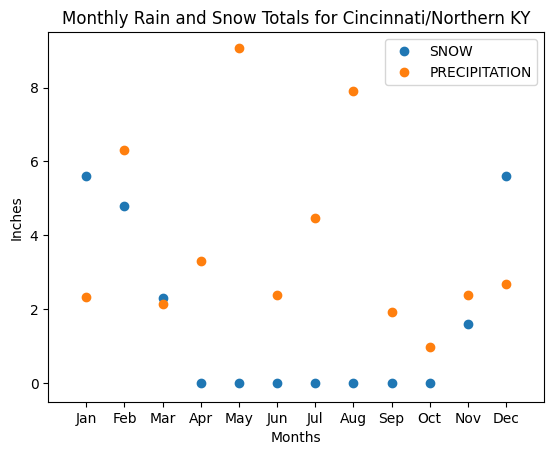

In [30]:
plt.plot(months, Cin_NKY_monthly_sum,'o') 
plt.xlabel('Months')
plt.ylabel('Inches') 
plt.title('Monthly Rain and Snow Totals for Cincinnati/Northern KY')
plt.legend(Cin_NKY_monthly_sum)
plt.axis([-1,12, -0.5,9.5])
plt.show() 

# Louisville KY 
### Section 1:
Understanding data. Cleaning and manipulating data
### Section 2:
Analysis and graphing of data

In [31]:
#Understanding Louisville Data
Loui_column_list = df2_Louis_W.columns
print(Loui_column_list) 
Loui_data_types = df2_Louis_W.dtypes
print(Loui_data_types) 
Loui_shape = df2_Louis_W.shape
print(Loui_shape) 

Index(['NAME', 'LATITUDE', 'LONGITUDE', 'DATE', 'PRCP', 'SNOW', 'TAVG', 'TMAX',
       'TMIN'],
      dtype='object')
NAME                 object
LATITUDE            float64
LONGITUDE           float64
DATE         datetime64[ns]
PRCP                float64
SNOW                float64
TAVG                  int64
TMAX                  int64
TMIN                  int64
dtype: object
(365, 9)


# Feature 2: Clean and Manipulate Data
The rename() function is used to alter the column names in each dataset. The 'NAME' column is changed to 'LOCATION', 'TMIN' to 'LOW', and so on. 
The drop() function removes rows or columns by specifying label names. Both 'LATITUDE' and 'LONGITUDE' columns are removed.
The inplace = True argumet makes changes permanent. 
The datetime module changed the 'DATE' from a string-type object to datetime64.

In [32]:
#Renaming Louisville Columns
df2_Louis_W.rename(columns = {'NAME': 'LOCATION', 'TMIN': 'LOW', 'TMAX': 'HIGH', 'PRCP': 'PRECIPITATION', 'TAVG': 'AVERAGE'}, inplace = True)

# Deleting Columns for the Louisville dataframe
df2_Louis_W.drop(columns = ['LATITUDE', 'LONGITUDE'], inplace = True) 

In [33]:
df2_Louis_W.head(7) 

,LOCATION,DATE,PRECIPITATION,SNOW,AVERAGE,HIGH,LOW
0,"LOUISVILLE INT AIRPORT, KY US",2022-01-01,2.08,0.0,61,64,55
1,"LOUISVILLE INT AIRPORT, KY US",2022-01-02,0.01,0.0,46,57,31
2,"LOUISVILLE INT AIRPORT, KY US",2022-01-03,0.00,0.0,31,37,25
3,"LOUISVILLE INT AIRPORT, KY US",2022-01-04,0.00,0.0,32,46,24
4,"LOUISVILLE INT AIRPORT, KY US",2022-01-05,0.00,0.0,46,50,30
5,"LOUISVILLE INT AIRPORT, KY US",2022-01-06,0.21,2.3,26,30,15
6,"LOUISVILLE INT AIRPORT, KY US",2022-01-07,0.00,0.0,16,22,11


# Feature 3: Data Analysis
The mean() function is used to calculate the mean (average) for the 'HIGH', 'LOW', and 'AVERAGE' columns.
The round() function returns a rounded version of a float number with a specified number of decimals.
The max() function returns the highest value for the 'HIGH' column.
The min() function returns the lowest value for the 'LOW' column.
The sum() function adds the values for the 'SNOW', and 'PRECIPITATION' columns. 

In [74]:
# Calculations for Louisville Ky
Loui_monthly_mean = df2_Louis_W.groupby(df2_Louis_W.DATE.dt.month)[['HIGH', 'LOW', 'AVERAGE']].mean().round(1)  
Loui_monthly_max = df2_Louis_W.groupby(df2_Louis_W.DATE.dt.month)[['HIGH']].max()
Loui_monthly_min = df2_Louis_W.groupby(df2_Louis_W.DATE.dt.month)[['LOW']].min() 
Loui_monthly_sum = df2_Louis_W.groupby(df2_Louis_W.DATE.dt.month)[['SNOW', 'PRECIPITATION']].sum().round(1) 

## Monthly mean data analysis for Louisville KY 
### Average Monthly Temperature
The coldest month of the year is January (32.8°F), followed by February (39.7°F), then December (39.8°F). 
Temperatures are much milder during March (51.5°F) and April (57.1°F) in the winter/spring. Fall temperatures are also mild during October (58.5°F) and November (49.0°F). 
July (81.7°F) is the hottest month of the year, followed by June (78.7°F) and August (78.5°F). May (70.9°F) and September (71.8°F) are warm and mild.  

In [72]:
Loui_monthly_mean

,HIGH,LOW,AVERAGE
DATE,,,
1,41.3,23.6,32.8
2,49.8,29.4,39.7
3,63.0,40.5,51.5
4,66.6,47.6,57.1
5,80.3,61.5,70.9
6,88.3,68.1,78.7
7,90.7,73.2,81.7
8,87.9,70.2,78.5
9,81.7,62.2,71.8


# Feature 4: Graphing
First graph displays the mean high, low, and average temperatures (In Fahrenheit) for each month of the year.
The second graph shows the highest and lowest temperature (In Fahrenheit) for each month.
The third graph shows the total monthly amount of precipitation and snowfall (In inches). 

### Monthly Mean Graph
The graph shows the mean high, low, and average, temperatures in Fahrenheit for each month. The three coldest months are January February and December, where temperatures average below 40°F. The five hottest months are between May and September with June through August being the hottest. During this time of the year, average temperatures are between 70°F to over 81°F. The rest of the year temperatures are cool, between 49°F and 58°F. 

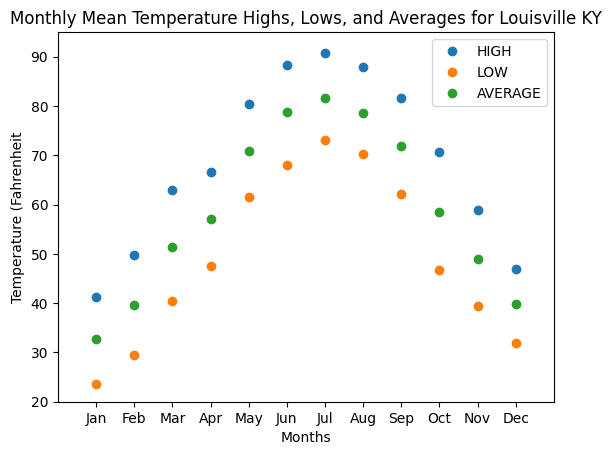

In [37]:
# Data Analysis for Louisville KY

plt.plot(months, Loui_monthly_mean, 'o')
plt.xlabel('Months')
plt.ylabel('Temperature (Fahrenheit')
plt.title('Monthly Mean Temperature Highs, Lows, and Averages for Louisville KY')
plt.legend(Loui_monthly_mean)
plt.axis([-1,12, 20,95])
plt.show() 

### Max and Min Data Analysis
The max data show the highest temperature for each month. The hottest day occured in July where the temperature reached 101°F. The next hottest day was in June, the temperature got to 100°F.
The min data show the lowest temperature for each month. The coldest day of the year occured in December, the temperature was -5°F. The second coldest day occurd in January, the temperature was 8°F.

In [38]:
Loui_monthly_max

,HIGH
DATE,
1,64
2,69
3,84
4,87
5,91
6,100
7,101
8,94
9,96


In [39]:
Loui_monthly_min

,LOW
DATE,
1,8
2,14
3,19
4,32
5,52
6,58
7,65
8,62
9,46


### Max and Min Graph
The max graph shows the hottest day for each month. The min graph shows the coldest day for month. 

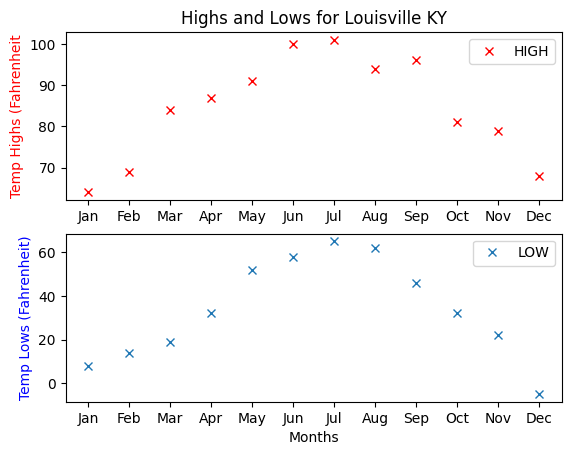

In [40]:
# Plot 1
x = months
y = Loui_monthly_max
plt.subplot(2, 1, 1,)  
plt.plot(x, y, 'x', color='r') 
plt.title('Highs and Lows for Louisville KY')
#plt.xlabel('Months') 
plt.legend(Loui_monthly_max)
plt.ylabel('Temp Highs (Fahrenheit', color='r')

# Plot 2
x = months
y = Loui_monthly_min
plt.subplot(2, 1, 2)
plt.plot(x, y, 'x')  
plt.xlabel('Months')
plt.ylabel('Temp Lows (Fahrenheit)', color='b')
plt.legend(Loui_monthly_min)

plt.show() 

### Snowfall and Precipitation Data Analysis
Snow fell only during five months of the year, with the greatest amount of snow occuring in January with 6.4 inches and 3.2 inches in December. The three months with the greatest amount of precipitation were February with 6.7 inches, July with 5.7 inches, and August with 4.7 inches. November and October had the least amount of precipitation, with October being the dryest month, with only 1.5 inchs of rain. 

In [75]:
Loui_monthly_sum

,SNOW,PRECIPITATION
DATE,,
1,6.4,4.5
2,1.6,6.7
3,1.5,2.4
4,0.0,4.4
5,0.0,3.2
6,0.0,2.8
7,0.0,5.7
8,0.0,4.7
9,0.0,2.0


### Snowfall and Precipitation Graph
The graph shows the monthly snowfall and precipitation totals in inches. Snow fell during five months of the year. January through March, then November and December. All 12 months of the year had some amount of rain. 

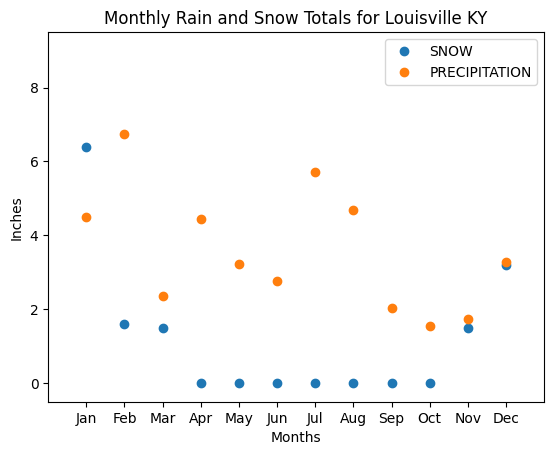

In [42]:
plt.plot(months, Loui_monthly_sum,'o') 
plt.xlabel('Months')
plt.ylabel('Inches') 
plt.title('Monthly Rain and Snow Totals for Louisville KY')
plt.legend(Loui_monthly_sum)
plt.axis([-1,12, -0.5,9.5])
plt.show() 

# New York City NY
### Section 1:
Understanding data. Cleaning and manipulating data
### Section 2:
Analysis and graphing of data

In [43]:
# Understanding New York City Data
NYC_column_list = df3_NYC_W.columns
print(NYC_column_list) 
NYC_data_types = df3_NYC_W.dtypes
print(NYC_data_types) 
NYC_shape = df3_NYC_W.shape
print(NYC_shape) 

Index(['NAME', 'LATITUDE', 'LONGITUDE', 'DATE', 'PRCP', 'SNOW', 'TAVG', 'TMAX',
       'TMIN'],
      dtype='object')
NAME                 object
LATITUDE            float64
LONGITUDE           float64
DATE         datetime64[ns]
PRCP                float64
SNOW                float64
TAVG                  int64
TMAX                  int64
TMIN                  int64
dtype: object
(365, 9)


# Feature 2: Clean and Manipulate Data
The rename() function is used to alter the column names in each dataset. The 'NAME' column is changed to 'LOCATION', 'TMIN' to 'LOW', and so on. 
The drop() function removes rows or columns by specifying label names. Both 'LATITUDE' and 'LONGITUDE' columns are removed.
The inplace = True argumet makes changes permanent. 
The datetime module changed the 'DATE' from a string-type object to datetime64.

In [44]:
#Renaming New York City Columns
df3_NYC_W.rename(columns = {'NAME': 'LOCATION', 'TMIN': 'LOW', 'TMAX': 'HIGH', 'PRCP': 'PRECIPITATION', 'TAVG': 'AVERAGE'}, inplace = True)  

#Deleting Columns for the New York City dataframe
df3_NYC_W.drop(columns = ['LATITUDE', 'LONGITUDE'], inplace = True) 

In [82]:
df3_NYC_W.head(6) 

,LOCATION,DATE,PRECIPITATION,SNOW,AVERAGE,HIGH,LOW
0,"JFK INT AIRPORT, NY US",2022-01-01,1.22,0.0,50,53,48
1,"JFK INT AIRPORT, NY US",2022-01-02,0.03,0.0,53,59,38
2,"JFK INT AIRPORT, NY US",2022-01-03,0.00,0.0,34,39,22
3,"JFK INT AIRPORT, NY US",2022-01-04,0.00,0.0,25,33,19
4,"JFK INT AIRPORT, NY US",2022-01-05,0.29,0.0,36,46,30
5,"JFK INT AIRPORT, NY US",2022-01-06,0.00,0.0,39,41,34


# Feature 3: Data Analysis
The mean() function is used to calculate the mean (average) for the 'HIGH', 'LOW', and 'AVERAGE' columns.
The round() function returns a rounded version of a float number with a specified number of decimals.
The max() function returns the highest value for the 'HIGH' column.
The min() function returns the lowest value for the 'LOW' column.
The sum() function adds the values for the 'SNOW', and 'PRECIPITATION' columns. 

In [80]:
# Calculations for New York City
NYC_monthly_mean = df3_NYC_W.groupby(df3_NYC_W.DATE.dt.month)[['HIGH', 'LOW', 'AVERAGE']].mean().round(1)  
NYC_monthly_max = df3_NYC_W.groupby(df3_NYC_W.DATE.dt.month)[['HIGH']].max() 
NYC_monthly_min = df3_NYC_W.groupby(df3_NYC_W.DATE.dt.month)[['LOW']].min() 
NYC_monthly_sum = df3_NYC_W.groupby(df3_NYC_W.DATE.dt.month)[['SNOW', 'PRECIPITATION']].sum().round(1)  

## Monthly mean data analysis for New York City NY 
### Average Monthly Temperature
The coldest month of the year is January (31.0°F), followed by February (35.8°F), then December (37.8°F). 
Temperatures are much milder during March (43.4°F) and April (50.6°F) in the winter/spring. Fall temperatures are also mild during October (57.2°F) and November (50.5°F). 
July (78.5°F) is the hottest month of the year, followed by August (77.7°F). June (70.1°F), and September (69.9°F) are warm, and May (61.2°F) is cooler. 

In [78]:
# Data Analysis for New York City
NYC_monthly_mean

,HIGH,LOW,AVERAGE
DATE,,,
1,38.0,22.6,31.0
2,44.2,27.0,35.8
3,51.1,35.6,43.4
4,58.5,43.4,50.6
5,70.4,54.1,61.2
6,78.1,62.5,70.1
7,86.9,71.6,78.5
8,86.4,71.0,77.7
9,78.0,62.7,69.9


# Feature 4: Graphing
First graph displays the mean high, low, and average temperatures (In Fahrenheit) for each month of the year.
The second graph shows the highest and lowest temperature (In Fahrenheit) for each month.
The third graph shows the total monthly amount of precipitation and snowfall (In inches). 

## Monthly Mean Graph
The graph shows the mean high, low, and average, temperatures in Fahrenheit for each month. The three coldest months are January February and December, where temperatures average below 40°F. The five hottest months are between May and September with June through August being the hottest. During this time of the year, average temperatures are between 61°F to over 78°F. The rest of the year temperatures are cool, between 43°F and 58°F. 

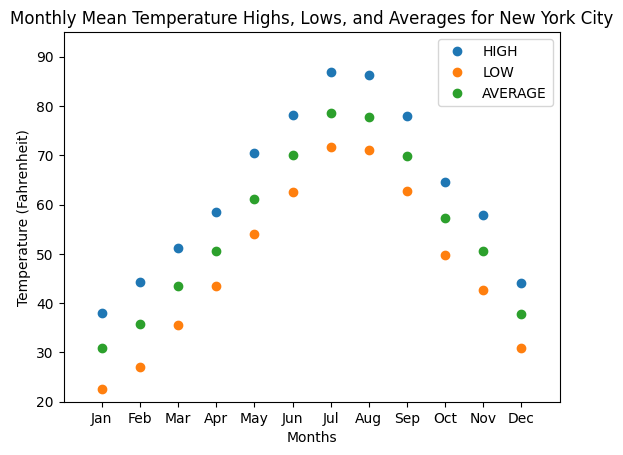

In [83]:
# Graph
plt.plot(months, NYC_monthly_mean, 'o')
plt.xlabel('Months')
plt.ylabel('Temperature (Fahrenheit)')
plt.title('Monthly Mean Temperature Highs, Lows, and Averages for New York City')
plt.legend(NYC_monthly_mean)
plt.axis([-1,12, 20,95])
plt.show()   

### Max and Min Data Analysis
The max data show the highest temperature for each month. The hottest day occured in July where the temperature reached 96°F. The next hottest day was in June and May, the temperature got to 94°F.
The min data show the lowest temperature for each month. The coldest day of the year occured in December, the temperature was 7°F. The second coldest day occurd in January, the temperature was 9°F.

In [49]:
NYC_monthly_max

,HIGH
DATE,
1,59
2,69
3,63
4,72
5,94
6,94
7,96
8,93
9,89


In [50]:
NYC_monthly_min

,LOW
DATE,
1,9
2,15
3,19
4,37
5,42
6,55
7,65
8,63
9,49


### Max and Min Graph
The max graph shows the hottest day for each month. The min graph shows the coldest day for month.

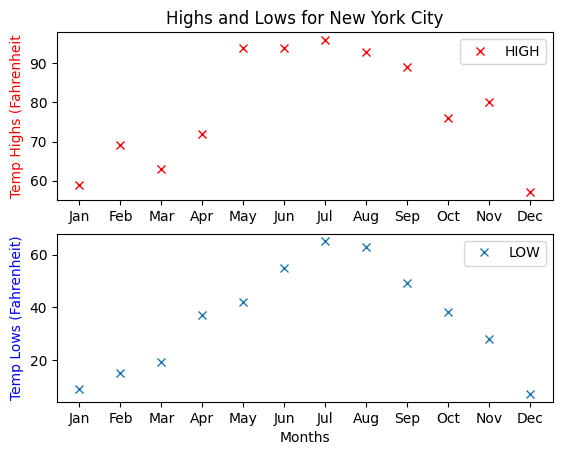

In [51]:
# Plot 1
x = months
y = NYC_monthly_max
plt.subplot(2, 1, 1,)  
plt.plot(x, y, 'x', color='r') 
plt.title('Highs and Lows for New York City')
#plt.xlabel('Months') 
plt.legend(NYC_monthly_max)
plt.ylabel('Temp Highs (Fahrenheit', color='r')

# Plot 2
x = months
y = NYC_monthly_min
plt.subplot(2, 1, 2)
plt.plot(x, y, 'x')  
plt.xlabel('Months')
plt.ylabel('Temp Lows (Fahrenheit)', color='b')
plt.legend(NYC_monthly_min) 

plt.show() 

### Snowfall and Precipitation Data Analysis
Snow fell only during the first three months of the year, with the greatest amount of snow occuring in January with 17.8 inches. February and March had much less snowfall, 3.2 inches and 0.5 inches respectively. The three months with the greatest amount of precipitation were October with 5.6 inches, January with 4.4 inches, and May with 4.4 inches. July and August had the least amount of precipitation, with August being the dryest month, with only 0.8 inchs of rain. 

In [81]:
NYC_monthly_sum

,SNOW,PRECIPITATION
DATE,,
1,17.8,4.4
2,3.2,3.1
3,0.5,2.6
4,0.0,3.1
5,0.0,4.3
6,0.0,3.2
7,0.0,1.1
8,0.0,0.8
9,0.0,1.8


### Snowfall and Precipitation Graph
The graph shows the monthly snowfall and precipitation totals in inches. Snow fell during January through March. All 12 months of the year had some amount of rain. 

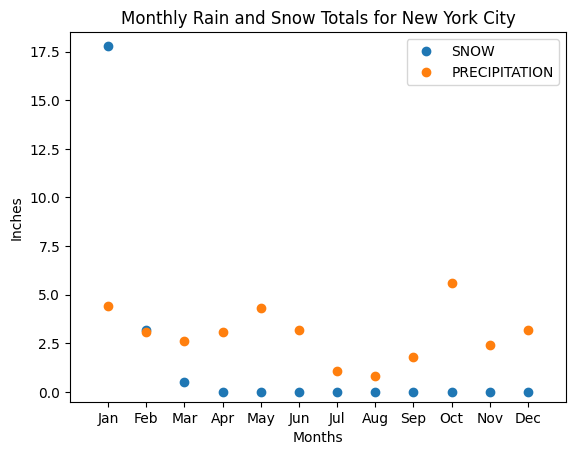

In [85]:
plt.plot(months, NYC_monthly_sum, 'o') 
plt.xlabel('Months')
plt.ylabel('Inches') 
plt.title('Monthly Rain and Snow Totals for New York City')
plt.legend(NYC_monthly_sum)
plt.axis([-1,12, -0.5,18.5])
plt.show() 

# Los Angeles CA
### Section 1:
Understanding data. Cleaning and manipulating data
### Section 2:
Analysis and graphing of data

In [54]:
# Understanding Los Angeles Data
LA_column_list = df4_LA_W.columns
print(LA_column_list) 
LA_data_types = df4_LA_W.dtypes
print(LA_data_types) 
LA_shape = df4_LA_W.shape
print(LA_shape) 

Index(['NAME', 'LATITUDE', 'LONGITUDE', 'DATE', 'PRCP', 'SNOW', 'TAVG', 'TMAX',
       'TMIN'],
      dtype='object')
NAME                 object
LATITUDE            float64
LONGITUDE           float64
DATE         datetime64[ns]
PRCP                float64
SNOW                float64
TAVG                  int64
TMAX                  int64
TMIN                  int64
dtype: object
(365, 9)


# Feature 2: Clean and Manipulate Data
The rename() function is used to alter the column names in each dataset. The 'NAME' column is changed to 'LOCATION', 'TMIN' to 'LOW', and so on. 
The drop() function removes rows or columns by specifying label names. Both 'LATITUDE' and 'LONGITUDE' columns are removed.
The inplace = True argumet makes changes permanent. 
The datetime module changed the 'DATE' from a string-type object to datetime64.
The fillna() function is used to fill Nan values with a specified value, in this case with a 0.

In [55]:
# Renaming Los Angeles Columns 
df4_LA_W.rename(columns = {'NAME': 'LOCATION', 'TMIN': 'LOW', 'TMAX': 'HIGH', 'PRCP': 'PRECIPITATION', 'TAVG': 'AVERAGE'}, inplace = True) 

# Deleting Columns for the Los Angeles dataframe 
df4_LA_W.drop(columns = ['LATITUDE', 'LONGITUDE'], inplace = True) 

# Replacing NaN with 0 in LA dataframe
df4_LA_W['SNOW'] = df4_LA_W['SNOW'].fillna(0) # The fillna() function is used to fill NaN value with a specified value, in this case with a 0. 

In [56]:
df4_LA_W.head(7) 

,LOCATION,DATE,PRECIPITATION,SNOW,AVERAGE,HIGH,LOW
0,"LAX AIRPORT, CA US",2022-01-01,0.0,0.0,55,61,49
1,"LAX AIRPORT, CA US",2022-01-02,0.0,0.0,54,66,45
2,"LAX AIRPORT, CA US",2022-01-03,0.0,0.0,53,60,44
3,"LAX AIRPORT, CA US",2022-01-04,0.0,0.0,52,60,44
4,"LAX AIRPORT, CA US",2022-01-05,0.0,0.0,54,65,45
5,"LAX AIRPORT, CA US",2022-01-06,0.0,0.0,56,66,47
6,"LAX AIRPORT, CA US",2022-01-07,0.0,0.0,53,57,51


# Feature 3: Data Analysis
The mean() function is used to calculate the mean (average) for the 'HIGH', 'LOW', and 'AVERAGE' columns.
The round() function returns a rounded version of a float number with a specified number of decimals.
The max() function returns the highest value for the 'HIGH' column.
The min() function returns the lowest value for the 'LOW' column.
The sum() function adds the values for the 'SNOW', and 'PRECIPITATION' columns. 

In [86]:

# Calculations for Los Angeles
LA_monthly_mean = df4_LA_W.groupby(df4_LA_W.DATE.dt.month)[['HIGH', 'LOW', 'AVERAGE']].mean().round(1)  
LA_monthly_max = df4_LA_W.groupby(df4_LA_W.DATE.dt.month)[['HIGH']].max() 
LA_monthly_min = df4_LA_W.groupby(df4_LA_W.DATE.dt.month)[['LOW']].min() 
LA_monthly_sum = df4_LA_W.groupby(df4_LA_W.DATE.dt.month)[['SNOW', 'PRECIPITATION']].sum().round(1)  

In [58]:
df4_LA_W.head(7) 

,LOCATION,DATE,PRECIPITATION,SNOW,AVERAGE,HIGH,LOW
0,"LAX AIRPORT, CA US",2022-01-01,0.0,0.0,55,61,49
1,"LAX AIRPORT, CA US",2022-01-02,0.0,0.0,54,66,45
2,"LAX AIRPORT, CA US",2022-01-03,0.0,0.0,53,60,44
3,"LAX AIRPORT, CA US",2022-01-04,0.0,0.0,52,60,44
4,"LAX AIRPORT, CA US",2022-01-05,0.0,0.0,54,65,45
5,"LAX AIRPORT, CA US",2022-01-06,0.0,0.0,56,66,47
6,"LAX AIRPORT, CA US",2022-01-07,0.0,0.0,53,57,51


## Monthly mean data analysis for Los Angeles CA 
### Average Monthly Temperature
Temperatures range from cool to mild to warm during the year, and never get very cold or drop below 56°F. December has the lowest temperature with 56.7°F, followed by January with 58.6°F. November and February are slightly warmer with temperatures over 59°F. September (74.9°F) and August (71.0°F) are the only months with an average temperature above 70°F. The rest of the year temperatures range between 60.3°F and 67.7°F. 

In [87]:
# Data Analysis for Los Angeles
LA_monthly_mean 

,HIGH,LOW,AVERAGE
DATE,,,
1,68.5,50.0,58.6
2,70.9,48.8,59.5
3,69.2,52.6,60.3
4,71.2,56.0,62.8
5,69.7,57.7,63.0
6,73.7,62.4,67.0
7,75.1,64.0,68.3
8,78.0,66.4,71.0
9,83.2,68.8,74.9


# Feature 4: Graphing
First graph displays the mean high, low, and average temperatures (In Fahrenheit) for each month of the year.
The second graph shows the highest and lowest temperature (In Fahrenheit) for each month.
The third graph shows the total monthly amount of precipitation and snowfall (In inches). 

## Monthly Mean Graph
The graph shows the mean high, low, and average, temperatures in Fahrenheit for each month. The coolest months are January February November and December, where temperatures average below 60°F. August and September are only months where the average temperature is above 70°F . The rest of the year temperatures are vey mild, average temperature range is between 60.3°F and 68.3°F. 

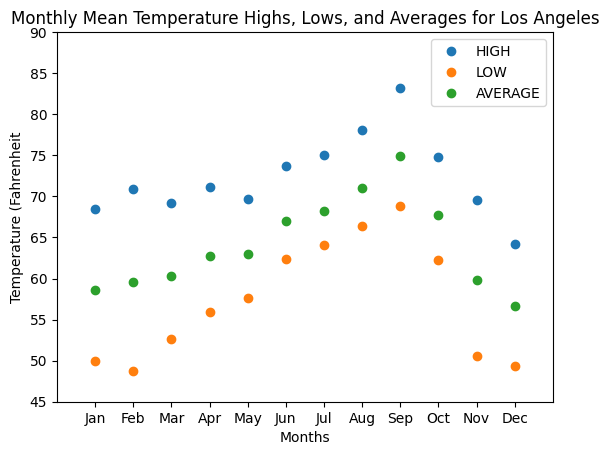

In [60]:
plt.plot(months, LA_monthly_mean, 'o')
plt.xlabel('Months')
plt.ylabel('Temperature (Fahrenheit')
plt.title('Monthly Mean Temperature Highs, Lows, and Averages for Los Angeles')
plt.legend(LA_monthly_mean)
plt.axis([-1,12, 45,90])
plt.show()  

### Max and Min Data Analysis
The max data show the highest temperature for each month. The hottest day occured in September where the temperature reached 102°F. The next hottest day was in April and October, the temperatures reached to 97°F, and 94°F respectively.
The min data show the lowest temperature for each month. The coldest day of the year occured in February, the temperature was 39°F. The second coldest day occurd in December, the temperature was 43°F.

In [61]:
LA_monthly_max

,HIGH
DATE,
1,80
2,89
3,84
4,97
5,81
6,80
7,85
8,84
9,102


In [62]:
LA_monthly_min

,LOW
DATE,
1,44
2,39
3,44
4,51
5,51
6,59
7,62
8,62
9,62


### Max and Min Graph
The max graph shows the hottest day for each month. The min graph shows the coldest day for month.

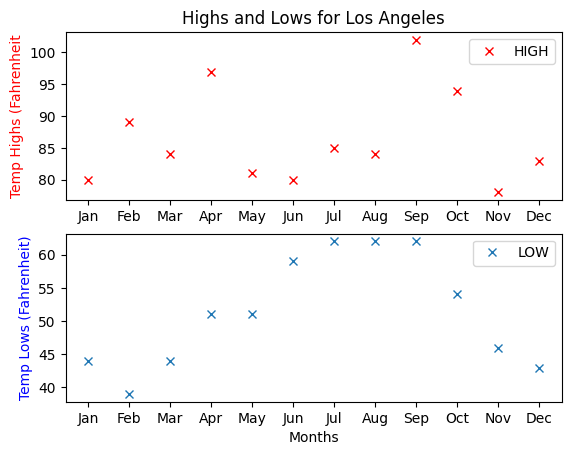

In [63]:
# Plot 1
x = months
y = LA_monthly_max
plt.subplot(2, 1, 1,)  
plt.plot(x, y, 'x', color='r') 
plt.title('Highs and Lows for Los Angeles')
#plt.xlabel('Months') 
plt.legend(LA_monthly_max)
plt.ylabel('Temp Highs (Fahrenheit', color='r')

# Plot 2
x = months
y = LA_monthly_min
plt.subplot(2, 1, 2)
plt.plot(x, y, 'x')  
plt.xlabel('Months')
plt.ylabel('Temp Lows (Fahrenheit)', color='b')
plt.legend(LA_monthly_min) 

plt.show() 

### Snowfall and Precipitation Data Analysis
There was no snowfall. Precipitation occured during only seven months of the year. March and November had more than one inch of rain, and December was the only month of the year with more than two inches of precipitation. 

In [64]:
LA_monthly_sum

,SNOW,PRECIPITATION
DATE,,
1,0.0,0.1
2,0.0,0.0
3,0.0,1.1
4,0.0,0.2
5,0.0,0.0
6,0.0,0.0
7,0.0,0.0
8,0.0,0.0
9,0.0,0.1


### Snowfall and Precipitation Graph
The graph shows the monthly snowfall and precipitation totals in inches. There was no snowfall for the entire year. Only seven of the 12 months had precipitation, with the greatest amount falling during November and December. 

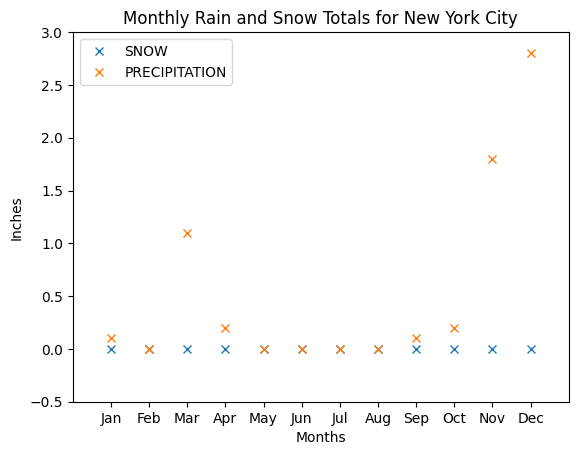

In [88]:
plt.plot(months, LA_monthly_sum, 'x',) 
plt.xlabel('Months')
plt.ylabel('Inches') 
plt.title('Monthly Rain and Snow Totals for New York City')
plt.legend(LA_monthly_sum)
plt.axis([-1,12, -0.5,3.0])
plt.show() 

In [66]:
# Combine DataFrames 
df_Cities_Weather = pd.concat([df1_Cin_NKY_W, df2_Louis_W, df3_NYC_W, df4_LA_W]) # The concat() function is used to combine multiple dataframes.
df_Cities_Weather['DATE'] = pd.to_datetime(df_Cities_Weather['DATE']) 

In [67]:
Cities_monthly_mean = df_Cities_Weather.groupby([(df_Cities_Weather.DATE.dt.month), 'LOCATION'])[['HIGH', 'LOW', 'AVERAGE']].mean().round(2) 
# The groupby function() is used to group datapoints based on values in specified column or columns, in this case based on the location column. 
Cities_monthly_mean

HIGH    LOW  AVERAGE
DATE LOCATION                                                   
1    CIN/NKY INTERNATIONAL AIRPORT, KY US  36.65  19.68    28.55
     JFK INT AIRPORT, NY US                38.03  22.58    30.97
     LAX AIRPORT, CA US                    68.52  50.00    58.65
     LOUISVILLE INT AIRPORT, KY US         41.29  23.65    32.77
2    CIN/NKY INTERNATIONAL AIRPORT, KY US  44.39  25.32    35.00
     JFK INT AIRPORT, NY US                44.21  27.04    35.75
     LAX AIRPORT, CA US                    70.93  48.79    59.54
     LOUISVILLE INT AIRPORT, KY US         49.79  29.39    39.71
3    CIN/NKY INTERNATIONAL AIRPORT, KY US  58.74  36.65    47.55
     JFK INT AIRPORT, NY US                51.06  35.61    43.35
     LAX AIRPORT, CA US                    69.23  52.58    60.26
     LOUISVILLE INT AIRPORT, KY US         62.97  40.52    51.45
4    CIN/NKY INTERNATIONAL AIRPORT, KY US  61.53  42.70    52.47
     JFK INT AIRPORT, NY US                58.53  43.37    50.60
     LAX AIRPORT, CA US                    71.20  55.97    62.80
     LOUISVILLE INT AIRPORT, KY US         66.57  47.63    57.07
5    CIN/NKY INTERNATIONAL AIRPORT, KY US  76.90  57.52    67.26
     JFK INT AIRPORT, NY US                70.35  54.13    61.23
     LAX AIRPORT, CA US                    69.71  57.68    62.97
     LOUISVILLE INT AIRPORT, KY US         80.32  61.45    70.87
6    CIN/NKY INTERNATIONAL AIRPORT, KY US  84.63  63.90    74.17
     JFK INT AIRPORT, NY US                78.10  62.47    70.07
     LAX AIRPORT, CA US                    73.67  62.37    67.00
     LOUISVILLE INT AIRPORT, KY US         88.30  68.13    78.73
7    CIN/NKY INTERNATIONAL AIRPORT, KY US  86.90  69.42    77.87
     JFK INT AIRPORT, NY US                86.94  71.65    78.52
     LAX AIRPORT, CA US                    75.10  64.03    68.26
     LOUISVILLE INT AIRPORT, KY US         90.74  73.16    81.71
8    CIN/NKY INTERNATIONAL AIRPORT, KY US  84.16  65.94    74.42
     JFK INT AIRPORT, NY US                86.35  71.03    77.68
     LAX AIRPORT, CA US                    78.03  66.39    71.00
     LOUISVILLE INT AIRPORT, KY US         87.90  70.23    78.55
9    CIN/NKY INTERNATIONAL AIRPORT, KY US  77.57  58.57    67.67
     JFK INT AIRPORT, NY US                77.97  62.70    69.87
     LAX AIRPORT, CA US                    83.20  68.83    74.87
     LOUISVILLE INT AIRPORT, KY US         81.70  62.23    71.83
10   CIN/NKY INTERNATIONAL AIRPORT, KY US  67.00  43.71    54.97
     JFK INT AIRPORT, NY US                64.45  49.74    57.19
     LAX AIRPORT, CA US                    74.84  62.26    67.74
     LOUISVILLE INT AIRPORT, KY US         70.77  46.81    58.45
11   CIN/NKY INTERNATIONAL AIRPORT, KY US  54.87  36.17    46.00
     JFK INT AIRPORT, NY US                57.77  42.70    50.53
     LAX AIRPORT, CA US                    69.60  50.53    59.77
     LOUISVILLE INT AIRPORT, KY US         58.90  39.40    49.03
12   CIN/NKY INTERNATIONAL AIRPORT, KY US  43.23  27.58    35.74
     JFK INT AIRPORT, NY US                44.10  30.87    37.84
     LAX AIRPORT, CA US                    64.16  49.32    56.71
     LOUISVILLE INT AIRPORT, KY US         46.94  31.87    39.81

<AxesSubplot: title={'center': 'Temperature Comparison for Cincinnati/NKY, Louisville, New York, Los Angeles'}, xlabel='Months (2022)', ylabel='Temperature (Fahrenheit)'>

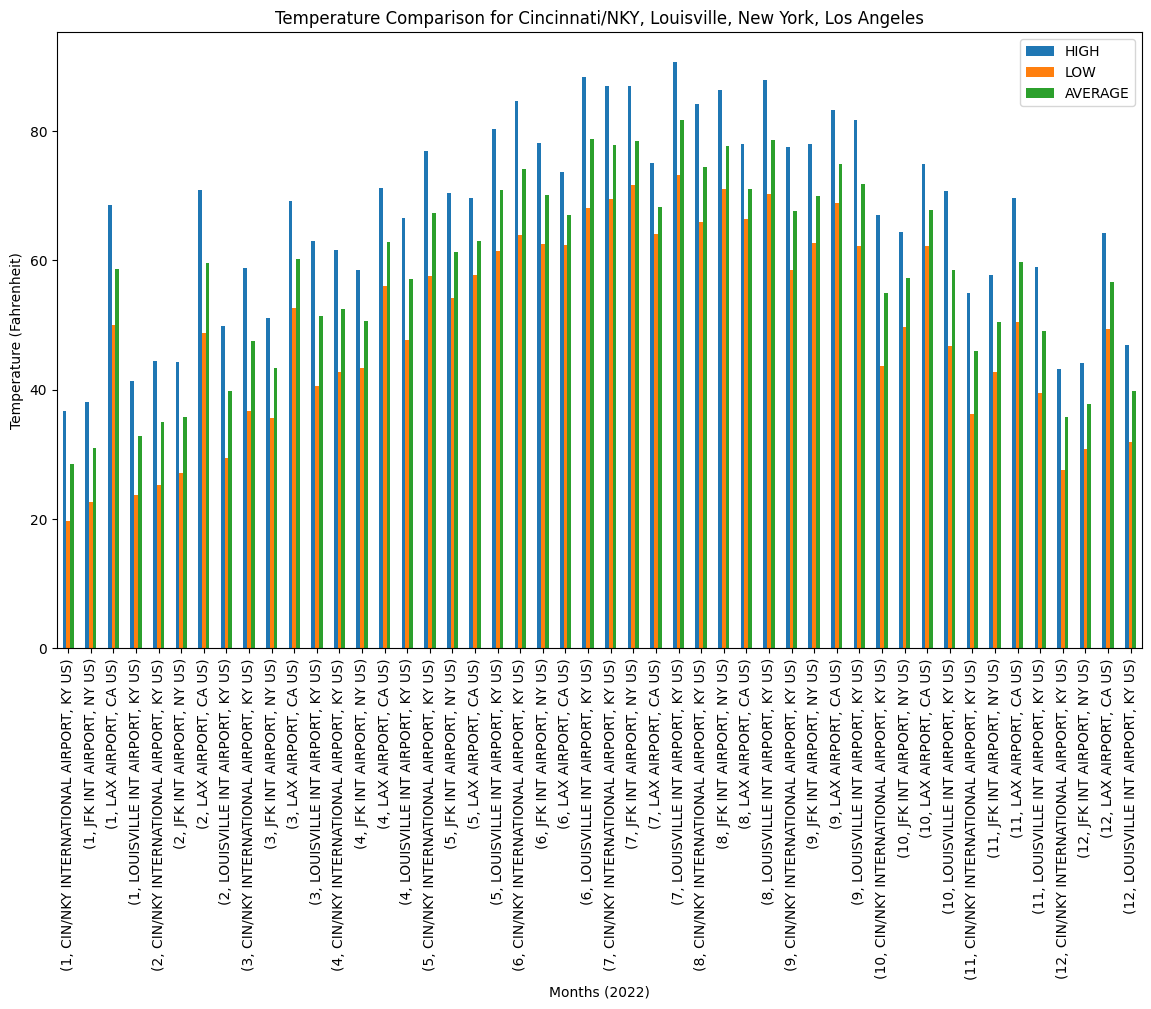

In [68]:
Cities_monthly_mean.plot(kind='bar', figsize=(14,8), xlabel='Months (2022)', ylabel='Temperature (Fahrenheit)', title='Temperature Comparison for Cincinnati/NKY, Louisville, New York, Los Angeles')  


In [69]:
Cities_monthly_sum = df_Cities_Weather.groupby([(df_Cities_Weather.DATE.dt.month), 'LOCATION'])[['SNOW', 'PRECIPITATION']].sum().round(2)
Cities_monthly_sum

SNOW  PRECIPITATION
DATE LOCATION                                                 
1    CIN/NKY INTERNATIONAL AIRPORT, KY US   5.6           2.34
     JFK INT AIRPORT, NY US                17.8           4.37
     LAX AIRPORT, CA US                     0.0           0.09
     LOUISVILLE INT AIRPORT, KY US          6.4           4.49
2    CIN/NKY INTERNATIONAL AIRPORT, KY US   4.8           6.30
     JFK INT AIRPORT, NY US                 3.2           3.08
     LAX AIRPORT, CA US                     0.0           0.04
     LOUISVILLE INT AIRPORT, KY US          1.6           6.74
3    CIN/NKY INTERNATIONAL AIRPORT, KY US   2.3           2.14
     JFK INT AIRPORT, NY US                 0.5           2.62
     LAX AIRPORT, CA US                     0.0           1.10
     LOUISVILLE INT AIRPORT, KY US          1.5           2.37
4    CIN/NKY INTERNATIONAL AIRPORT, KY US   0.0           3.30
     JFK INT AIRPORT, NY US                 0.0           3.10
     LAX AIRPORT, CA US                     0.0           0.23
     LOUISVILLE INT AIRPORT, KY US          0.0           4.44
5    CIN/NKY INTERNATIONAL AIRPORT, KY US   0.0           9.08
     JFK INT AIRPORT, NY US                 0.0           4.34
     LAX AIRPORT, CA US                     0.0           0.00
     LOUISVILLE INT AIRPORT, KY US          0.0           3.23
6    CIN/NKY INTERNATIONAL AIRPORT, KY US   0.0           2.38
     JFK INT AIRPORT, NY US                 0.0           3.25
     LAX AIRPORT, CA US                     0.0           0.01
     LOUISVILLE INT AIRPORT, KY US          0.0           2.77
7    CIN/NKY INTERNATIONAL AIRPORT, KY US   0.0           4.48
     JFK INT AIRPORT, NY US                 0.0           1.10
     LAX AIRPORT, CA US                     0.0           0.00
     LOUISVILLE INT AIRPORT, KY US          0.0           5.71
8    CIN/NKY INTERNATIONAL AIRPORT, KY US   0.0           7.91
     JFK INT AIRPORT, NY US                 0.0           0.85
     LAX AIRPORT, CA US                     0.0           0.00
     LOUISVILLE INT AIRPORT, KY US          0.0           4.69
9    CIN/NKY INTERNATIONAL AIRPORT, KY US   0.0           1.94
     JFK INT AIRPORT, NY US                 0.0           1.85
     LAX AIRPORT, CA US                     0.0           0.13
     LOUISVILLE INT AIRPORT, KY US          0.0           2.04
10   CIN/NKY INTERNATIONAL AIRPORT, KY US   0.0           0.99
     JFK INT AIRPORT, NY US                 0.0           5.61
     LAX AIRPORT, CA US                     0.0           0.24
     LOUISVILLE INT AIRPORT, KY US          0.0           1.54
11   CIN/NKY INTERNATIONAL AIRPORT, KY US   1.6           2.39
     JFK INT AIRPORT, NY US                 0.0           2.43
     LAX AIRPORT, CA US                     0.0           1.77
     LOUISVILLE INT AIRPORT, KY US          1.5           1.74
12   CIN/NKY INTERNATIONAL AIRPORT, KY US   5.6           2.69
     JFK INT AIRPORT, NY US                 0.0           3.17
     LAX AIRPORT, CA US                     0.0           2.79
     LOUISVILLE INT AIRPORT, KY US          3.2           3.28

<AxesSubplot: title={'center': 'Monthly Total Snowfall and Precipitation for Cincinnati/NKY, Louisville, New York, Los Angeles'}, xlabel='Months', ylabel='Inches'>

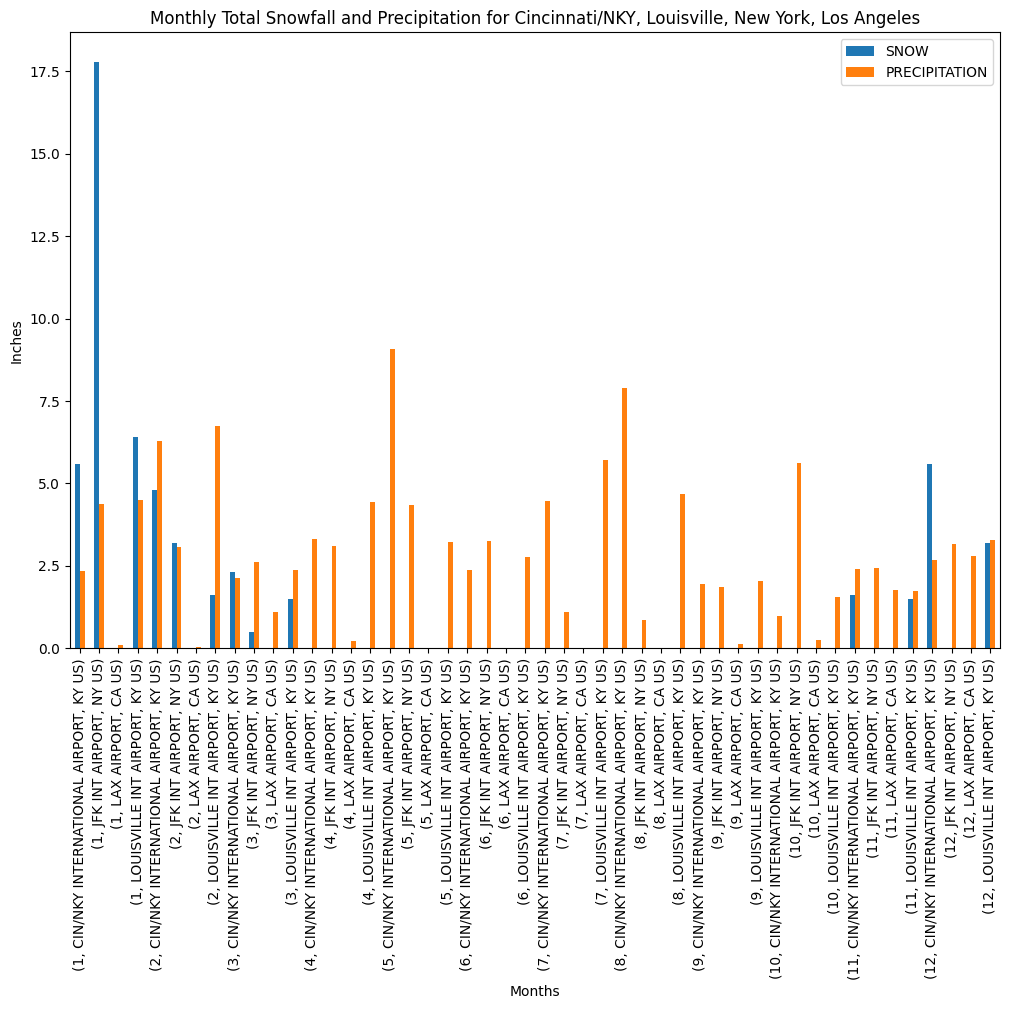

In [70]:
Cities_monthly_sum.plot(kind='bar', figsize=(12,8), xlabel='Months', ylabel='Inches', title='Monthly Total Snowfall and Precipitation for Cincinnati/NKY, Louisville, New York, Los Angeles')